In [1]:
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
X= np.array([
    [2104,3,15],
    [1600,3,20],
    [2400,4,5],
    [1416,2,18],
    [3000,4,30]
],dtype=float)
y=np.array([399900,329900,369000,232000,539900],dtype=float)

In [3]:
X_mean=np.mean(X,axis=0)
X_std=np.std(X,axis=0)
X_norm=(X-X_mean)/X_std

In [5]:
m=X.shape[0]
X_b=np.c_[np.ones((m,1)),X_norm]

In [6]:
def compute_cost(X,y,theta):
    m=len(y)
    predictions=X.dot(theta)
    cost=(1/(2*m))*np.sum((predictions-y)**2)
    return cost

In [7]:
def gradient_descent(X,y,theta,learning_rate,iterations):
    m=len(y)
    cost_history=[]
    for _ in range(iterations):
        predictions=X.dot(theta)
        errors=predictions-y
        gradient=(1/m)*(X.T.dot(errors))
        theta -= learning_rate * gradient
        cost=compute_cost(X,y,theta)
        cost_history.append(cost)
    return theta, cost_history
        

In [8]:
theta_inti=np.zeros(X_b.shape[1])
theta,cost_history = gradient_descent(X_b, y, theta_inti, learning_rate=0.01, iterations=1000)
print("Learned Parameters:", theta)


Learned Parameters: [374123.84790949  56296.16855687  32340.92729744  33199.08480081]


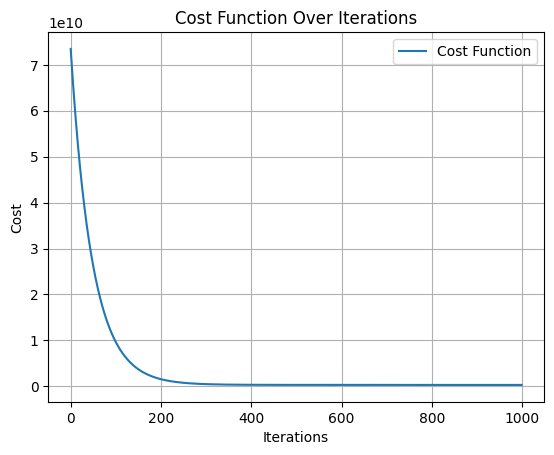

In [9]:
plt.plot(range(len(cost_history)),cost_history, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.legend()
plt.grid()
plt.show()

In [10]:
x_new=np.array([1650,3,15])
x_new_norm=(x_new-X_mean)/X_std
x_new_b=np.r_[1, x_new_norm]
predicted_price = x_new_b.dot(theta)
print(f"Predicted Price for {x_new}: ${predicted_price:.2f}")

Predicted Price for [1650    3   15]: $309845.01
